In [231]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

## Creating the function for extracting data.

In [232]:
num_points = 100
dx = 2/num_points
x_loc = np.linspace(-1,1,num_points)
y_loc_init = -np.sin(1*np.pi*x_loc)#  - np.sin(2*np.pi*x_loc) + np.sin(3*np.pi*x_loc) 
y_loc_init = y_loc_init/(np.max(np.abs(y_loc_init)))
y_loc = y_loc_init.copy()
mu = 0.0001

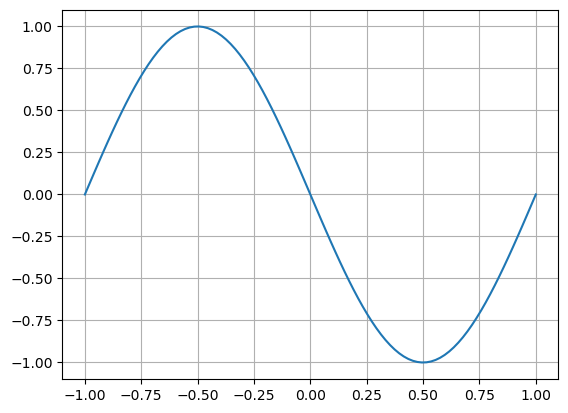

In [233]:
plt.plot(x_loc,y_loc)
plt.grid()

In [234]:
dt = 1/10000
fin_time = 1
time_iter = int (fin_time/dt)
time_loc = np.linspace(0,fin_time,time_iter)

Y_rec = np.zeros((time_iter,len(x_loc)))

In [235]:
#Y_rec = np.append(Y_rec,[y_loc], axis=0)

In [236]:
for i in range(len(time_loc)):
    temp_y = y_loc.copy()
    dy_dx = np.zeros(num_points)
    d2y_dx = np.zeros(num_points)

    #dy_dx = np.diff(np.concatenate((temp_y[:],[temp_y[0]])))/dx 
    #d2y_dx = np.diff(np.concatenate((dy_dx,[dy_dx[0]])))/dx

    dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
    dy_dx[0] = (temp_y[0] - temp_y[-2])/dx
    dy_dx[-1] = (temp_y[-1] - temp_y[-2])/dx

    d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
    d2y_dx[0] = (temp_y[1] - 2*temp_y[0] + temp_y[-2]) / dx**2
    dy_dx[-1] = (temp_y[1] - 2*temp_y[-1] + temp_y[-2]) / dx**2

    #for j in range(num_points):
    #    dy_dx[j] = (temp_y[(j+1)%num_points] -temp_y[(j-1)%num_points])/(dx)
    #
    #for k in range(num_points):
    #    d2y_dx[k] = (temp_y[(k+1)%num_points] -2*temp_y[k] + temp_y[(k+1)%num_points])/dx**2

    dy = dt*(mu*d2y_dx - y_loc*dy_dx)
    y_loc = y_loc + dy
    #y_loc[0] = 0
    Y_rec[i,:] = y_loc

C:\Users\dell\AppData\Local\Temp\ipykernel_1760\2393910968.py:23: RuntimeWarning: overflow encountered in multiply
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)
C:\Users\dell\AppData\Local\Temp\ipykernel_1760\2393910968.py:9: RuntimeWarning: invalid value encountered in subtract
  dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
C:\Users\dell\AppData\Local\Temp\ipykernel_1760\2393910968.py:13: RuntimeWarning: invalid value encountered in subtract
  d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_1760\2393910968.py:13: RuntimeWarning: invalid value encountered in add
  d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_1760\2393910968.py:23: RuntimeWarning: invalid value encountered in subtract
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)


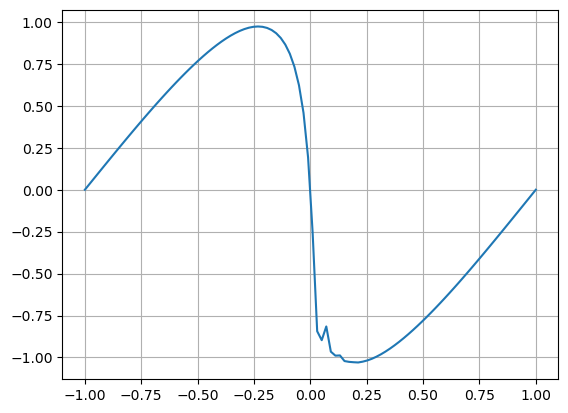

In [248]:
max_iter = 2800
plt.plot(x_loc,Y_rec[max_iter,:])
plt.grid()

In [238]:
df = pd.DataFrame()

In [239]:
df["Time"] = time_loc
df

,Time
0,0.0000
1,0.0001
2,0.0002
3,0.0003
4,0.0004
...,...
9995,0.9996
9996,0.9997
9997,0.9998
9998,0.9999


In [240]:
temp_df = pd.DataFrame(Y_rec)
temp_df2 = pd.DataFrame(x_loc).T
temp_df2 = pd.concat([temp_df2]*len(time_loc),ignore_index=True)
temp_df3 = pd.DataFrame(y_loc_init).T
temp_df3 = pd.concat([temp_df3]*len(time_loc),ignore_index=True)
temp_df3

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
1,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
2,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
3,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
4,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
9996,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
9997,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16
9998,1.224801e-16,0.063432,0.126608,0.189275,0.25118,0.312073,0.371709,0.429849,0.486258,0.540709,...,-0.540709,-0.486258,-0.429849,-0.371709,-0.312073,-0.25118,-0.189275,-0.126608,-0.063432,-1.224801e-16


In [241]:
result = pd.concat([temp_df2,temp_df3,df,temp_df],axis=1,ignore_index=True)
#result = pd.concat([result,temp_df],axis=1)
result = result.head(max_iter)
result

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,-0.540567,-0.486126,-0.429728,-0.371601,-0.311980,-0.251103,-0.189216,-0.126569,-0.063412,-1.224801e-16
1,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,-0.540426,-0.485993,-0.429607,-0.371493,-0.311887,-0.251027,-0.189158,-0.126529,-0.063392,-1.224801e-16
2,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,-0.540285,-0.485861,-0.429485,-0.371385,-0.311794,-0.250950,-0.189099,-0.126489,-0.063372,-1.224801e-16
3,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,-0.540144,-0.485729,-0.429364,-0.371277,-0.311701,-0.250874,-0.189041,-0.126450,-0.063352,-1.224801e-16
4,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,-0.540003,-0.485596,-0.429243,-0.371169,-0.311608,-0.250798,-0.188982,-0.126410,-0.063332,-1.224801e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
Final_df = pd.DataFrame(columns=range(num_points+3))
y_frame = pd.DataFrame(y_loc_init)

Final_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102


In [243]:
x_loc[10]

-0.797979797979798

In [244]:
import numpy as np
import pandas as pd

# Preallocate a NumPy array to hold the final result
Final_array = np.zeros((max_iter * num_points, 4))  # Assuming 4 columns (y_frame, x_loc, time_loc, Y_rec)

# Index pointer to populate rows
index = 0

# Loop through iterations and points
for i in range(max_iter):
    time_loc_value = time_loc[i]  # Pre-fetch the time_loc value for this iteration
    
    for j in range(num_points):
        # Directly assign values to the preallocated array
        Final_array[index, 0] = y_loc_init  # Assuming y_frame is a scalar
        Final_array[index, 1] = x_loc[j]
        Final_array[index, 2] = time_loc_value
        Final_array[index, 3] = Y_rec[i][j]
        
        index += 1
    
    print(i)

# Convert the preallocated NumPy array to a DataFrame
Final_df = pd.DataFrame(Final_array, columns=["y_frame", "x_loc", "time_loc", "Y_rec"])

print(Final_df)


ValueError: setting an array element with a sequence.

In [70]:
import numpy as np
import pandas as pd

# Initialize an empty list to collect rows
data = []

y_frame = np.array([y_loc_init])  # Convert y_loc_init to a 2D numpy array

for i in range(max_iter):
    for j in range(num_points):
        # Convert each array to 2D (if not already)
        x_loc_arr = np.array([x_loc[j]]).reshape(1, -1)  # Reshape to 2D
        time_loc_arr = np.array([time_loc[i]]).reshape(1, -1)  # Reshape to 2D
        Y_rec_arr = np.array([Y_rec[i][j]]).reshape(1, -1)  # Reshape to 2D
        
        # Concatenate along columns (axis=1)
        row = np.concatenate([y_frame, x_loc_arr, time_loc_arr, Y_rec_arr], axis=1).flatten()
        
        # Append the 1D row to the list
        data.append(row)
    
    print(i)

# Convert the list of 1D arrays (rows) to a 2D numpy array
Final_array = np.array(data)

# Finally, convert the numpy array to a pandas DataFrame
Final_df = pd.DataFrame(Final_array)

print(Final_df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [174]:
Final_df.to_csv('minus_sin_1_pi.csv')